In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from vincenty import vincenty # geopy.distance can also be used

In [2]:
import ipyleaflet
from ipyleaflet import Map, Polyline, LayersControl, basemaps, basemap_to_tiles, FullScreenControl, SearchControl, Marker,Icon, Circle,MarkerCluster

In [3]:
def vincenty_vec(vec_coord):
    vin_vec_dist = np.zeros(vec_coord.shape[0])
    if vec_coord.shape[1] !=  4:
        print('ERROR: Bad number of columns (shall be = 4)')
    else:
        vin_vec_dist = [vincenty(vec_coord[m,0:2],vec_coord[m,2:]) for m in range(vec_coord.shape[0])]
    return vin_vec_dist

In [4]:
# evaluate distance error for each predicted point
def Eval_geoloc(y_train_lat , y_train_lng, y_pred_lat, y_pred_lng):
    vec_coord = np.array([y_train_lat , y_train_lng, y_pred_lat, y_pred_lng])
    err_vec = vincenty_vec(np.transpose(vec_coord))
    
    return err_vec

In [5]:
#pip install ipyleaflet

In [6]:
# load train and test data
df_mess_train = pd.read_csv('mess_train_list.csv')
df_mess_test = pd.read_csv('mess_test_list.csv')
pos_train = pd.read_csv('pos_train_list.csv')

In [7]:
df_mess_train.head()

,messid,bsid,did,nseq,rssi,time_ux,bs_lat,bs_lng
0,573bf1d9864fce1a9af8c5c9,2841,473335.0,0.5,-121.5,1.463546e+12,39.617794,-104.954917
1,573bf1d9864fce1a9af8c5c9,3526,473335.0,2.0,-125.0,1.463546e+12,39.677251,-104.952721
2,573bf3533e952e19126b256a,2605,473335.0,1.0,-134.0,1.463547e+12,39.612745,-105.008827
3,573c0cd0f0fe6e735a699b93,2610,473953.0,2.0,-132.0,1.463553e+12,39.797969,-105.073460
4,573c0cd0f0fe6e735a699b93,3574,473953.0,1.0,-120.0,1.463553e+12,39.723151,-104.956216


<AxesSubplot:>

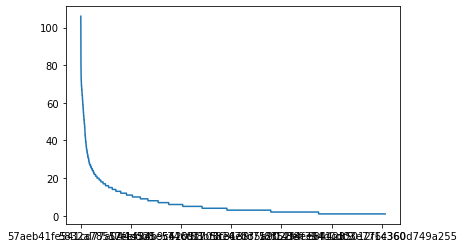

In [8]:
df_mess_train['messid'].value_counts().plot()

In [9]:
df_mess_train['did'].value_counts().head(20)

476185.0    6653
476829.0    4104
476521.0    3200
474192.0    2971
476327.0    2214
476609.0    1722
473796.0    1474
473899.0    1234
476512.0    1015
476889.0     900
476515.0     850
474176.0     818
476315.0     625
476835.0     604
476852.0     528
473507.0     527
476285.0     483
476212.0     477
473335.0     459
476325.0     445
Name: did, dtype: int64

In [10]:
df_mess_train['did'].value_counts().tail(20) # supprimer les did avec peu de messages ? <10

476593.0    14
476225.0    14
473502.0    14
476280.0    13
476329.0    13
476596.0    13
476324.0    12
473438.0    11
476332.0    11
473897.0    10
476523.0     7
476256.0     6
476253.0     6
476868.0     5
476307.0     5
476513.0     2
476507.0     2
476308.0     1
476248.0     1
476197.0     1
Name: did, dtype: int64

<AxesSubplot:xlabel='did,messid'>

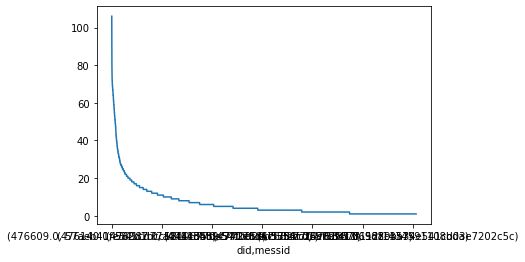

In [11]:
df_mess_train[['did','messid']].value_counts().plot() # supprimer les did,messid avec peu de messages ? <1 car la précision pouirrait être mauvaise

<AxesSubplot:>

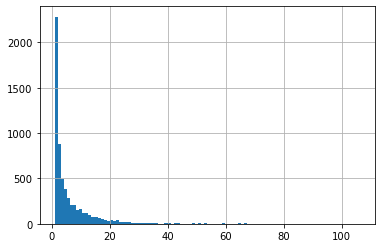

In [12]:
# a-t-on une bonne précision lorsqu'on a qu'un message n'est capté que par 1 antenne ?
df_mess_train.groupby('messid').count().bsid.hist(bins=100)

<AxesSubplot:>

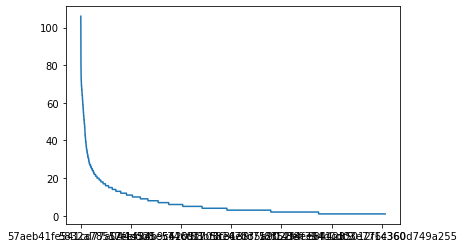

In [13]:
df_mess_train['messid'].value_counts().plot()

In [14]:
pos_train.head()

,lat,lng
0,39.606690,-104.958490
1,39.606690,-104.958490
2,39.637741,-104.958554
3,39.730417,-104.968940
4,39.730417,-104.968940


In [18]:
distances_bs_did_true = Eval_geoloc(pos_train['lat'], pos_train['lng'], df_mess_train['bs_lat'] , df_mess_train['bs_lng'])

In [19]:
df_mess_pos_train = pd.concat([df_mess_train,pos_train], axis=1)
df_mess_pos_train

,messid,bsid,did,nseq,rssi,time_ux,bs_lat,bs_lng,lat,lng
0,573bf1d9864fce1a9af8c5c9,2841,473335.0,0.5,-121.500000,1.463546e+12,39.617794,-104.954917,39.606690,-104.958490
1,573bf1d9864fce1a9af8c5c9,3526,473335.0,2.0,-125.000000,1.463546e+12,39.677251,-104.952721,39.606690,-104.958490
2,573bf3533e952e19126b256a,2605,473335.0,1.0,-134.000000,1.463547e+12,39.612745,-105.008827,39.637741,-104.958554
3,573c0cd0f0fe6e735a699b93,2610,473953.0,2.0,-132.000000,1.463553e+12,39.797969,-105.073460,39.730417,-104.968940
4,573c0cd0f0fe6e735a699b93,3574,473953.0,1.0,-120.000000,1.463553e+12,39.723151,-104.956216,39.730417,-104.968940
...,...,...,...,...,...,...,...,...,...,...
39245,5848672e12f14360d7942374,3410,476257.0,1.0,-128.000000,1.481140e+12,39.777690,-105.002424,39.773264,-105.014052
39246,5848672e12f14360d7942374,8352,476257.0,0.0,-121.000000,1.481140e+12,39.761633,-105.025753,39.773264,-105.014052
39247,5848672e12f14360d7942374,8397,476257.0,2.0,-126.000000,1.481140e+12,39.759396,-105.001415,39.773264,-105.014052
39248,58487473e541cd0e133cca72,3051,476593.0,1.0,-131.333333,1.481143e+12,39.898872,-105.153832,39.908186,-105.168297


In [20]:
df_mess_pos_train['dist_bs_did_true'] = df_mess_pos_train.apply(
    lambda row : vincenty([row['lat'],row['lng']],[row['bs_lat'],row['bs_lng']]),axis=1)

<AxesSubplot:>

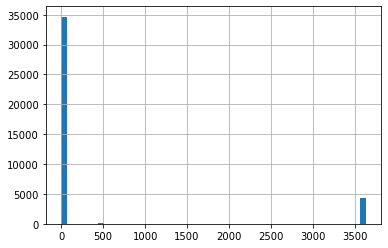

In [21]:
df_mess_pos_train['dist_bs_did_true'].hist(bins=50)

In [22]:
df_mess_pos_train[df_mess_pos_train['dist_bs_did_true'] > 3000]

,messid,bsid,did,nseq,rssi,time_ux,bs_lat,bs_lng,lat,lng,dist_bs_did_true
5106,57617e1ef0fe6e0c9fd6eb06,8355,476606.0,1.5,-106.5,1.466007e+12,64.3,-68.5,39.778694,-104.977050,3606.568595
5118,576180cf3e952e04b3b41e5c,8355,476512.0,0.5,-111.5,1.466008e+12,64.3,-68.5,39.783396,-104.999821,3607.052582
5179,5761a161f0fe6e0c9fec42b9,8355,473683.0,0.0,-126.0,1.466016e+12,64.3,-68.5,39.803407,-105.019300,3605.912250
5216,57623817864fce5689ec33af,8355,473683.0,0.5,-127.0,1.466055e+12,64.3,-68.5,39.803738,-105.018997,3605.867562
5416,5763734c864fce5689a422f3,8355,476600.0,1.5,-123.0,1.466135e+12,64.3,-68.5,39.803101,-105.023292,3606.107099
...,...,...,...,...,...,...,...,...,...,...,...
39237,58485bd412f14360d78bebdb,4987,476207.0,1.5,-130.5,1.481137e+12,64.3,-68.5,39.778872,-105.019285,3608.297231
39238,58485bd412f14360d78bebdb,4993,476207.0,0.0,-132.0,1.481137e+12,64.3,-68.5,39.778872,-105.019285,3608.297231
39241,58485bd412f14360d78bebdb,10151,476207.0,1.0,-122.0,1.481137e+12,64.3,-68.5,39.778872,-105.019285,3608.297231
39242,58485bd412f14360d78bebdb,11007,476207.0,1.0,-121.0,1.481137e+12,64.3,-68.5,39.778872,-105.019285,3608.297231


In [23]:
df_mess_pos_train2 = df_mess_pos_train[df_mess_pos_train['dist_bs_did_true'] < 3000]

<AxesSubplot:>

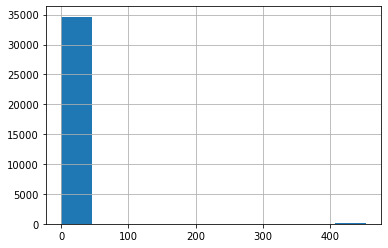

In [24]:
df_mess_pos_train2['dist_bs_did_true'].hist()

In [25]:
df_mess_pos_train2 = df_mess_pos_train2[df_mess_pos_train2['dist_bs_did_true'] < 100]#['bsid'].value_counts()

<AxesSubplot:>

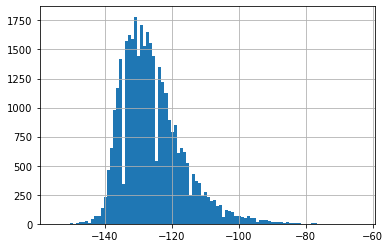

In [26]:
df_mess_pos_train2['rssi'].hist(bins=100)

<AxesSubplot:>

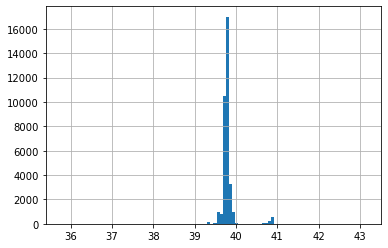

In [27]:
df_mess_pos_train2['lat'].hist(bins=100)

<AxesSubplot:>

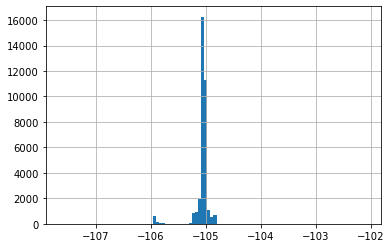

In [28]:
df_mess_pos_train2['lng'].hist(bins=100)

<Figure size 1440x720 with 0 Axes>

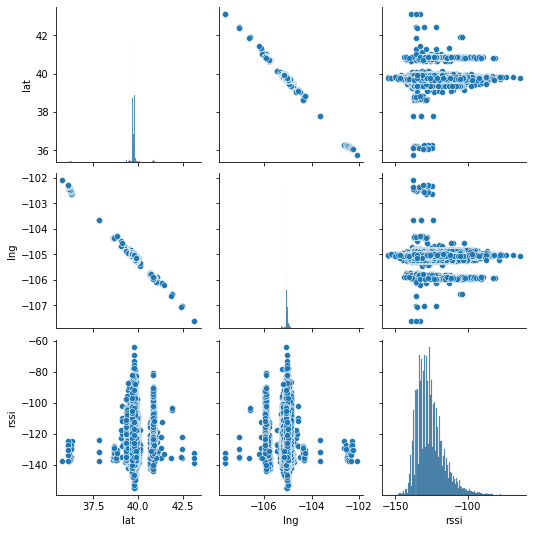

In [29]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.pairplot(df_mess_pos_train2[['lat','lng','rssi']]);

<AxesSubplot:>

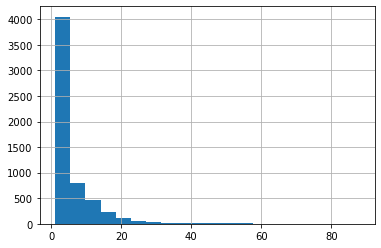

In [30]:
#nombre de balises par messages
df_mess_pos_train2['messid'].value_counts().hist(bins=20)

In [31]:
distances_bs_did_true.hist()

AttributeError: 'list' object has no attribute 'hist'

In [33]:
df_bs_pos = df_mess_pos_train2[['bsid','bs_lat','bs_lng']].drop_duplicates()
df_bs_pos

,bsid,bs_lat,bs_lng
0,2841,39.617794,-104.954917
1,3526,39.677251,-104.952721
2,2605,39.612745,-105.008827
3,2610,39.797969,-105.073460
4,3574,39.723151,-104.956216
...,...,...,...
33397,7655,41.117167,-106.247588
33399,1852,41.564439,-106.165570
33400,7972,41.396888,-106.131664
35119,4813,39.417820,-104.968154


In [34]:
# Position des bs
m = Map(basemap=basemaps.OpenStreetMap.Mapnik, zoom=3)
markerList = [Marker(name=str(bsid), location=[lat, lng], draggable=False) for bsid, lat, lng in df_bs_pos.values]

marker_cluster = MarkerCluster(
    markers=markerList
)
m.add_layer(marker_cluster)
m

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [35]:
# Position des devices
m = Map(basemap=basemaps.OpenStreetMap.Mapnik, zoom=3)
markerList = [Marker(location=position, draggable=False) for position in pos_train.values.tolist()]

marker_cluster = MarkerCluster(
    markers=markerList
)
m.add_layer(marker_cluster)
m

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [36]:
listOfBs = np.union1d(np.unique(df_mess_train['bsid']), np.unique(df_mess_test['bsid'])) # determine all Base stations that received at least 1 message

In [37]:
len(listOfBs)

259

In [38]:
# Feature Matrix construction 

def feat_mat_const(df_mess_train, listOfBs):

    df_mess_bs_group = df_mess_train.groupby(['messid'], as_index=False) # group data by message (messid)
    nb_mess = len(np.unique(df_mess_train['messid']))
    df_feat = pd.DataFrame(np.zeros((nb_mess,len(listOfBs))), columns = listOfBs) # feature matrix
    idx = 0
    id_list = [0] * nb_mess

    for key, elmt in df_mess_bs_group:
        df_mess_bs_group.get_group(key)
        df_feat.loc[idx,df_mess_bs_group.get_group(key)['bsid']] = 1
        id_list[idx] = key
        idx = idx + 1
    
    return df_feat, id_list # add id value of each message for the correspondance to message  

In [39]:
# ground truth construction

def ground_truth_const(df_mess_train, pos_train):

    df_mess_pos = df_mess_train.copy()
    df_mess_pos[['lat', 'lng']] = pos_train

    ground_truth_lat = np.array(df_mess_pos.groupby(['messid']).mean()['lat'])
    ground_truth_lng = np.array(df_mess_pos.groupby(['messid']).mean()['lng'])
    
    return ground_truth_lat, ground_truth_lng

In [40]:
df_feat, id_list_train = feat_mat_const(df_mess_train, listOfBs)
df_feat.head()

,879,911,921,944,980,1012,1086,1092,1120,1131,...,9936,9941,9949,10134,10148,10151,10162,10999,11007,11951
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
ground_truth_lat, ground_truth_lng = ground_truth_const(df_mess_train, pos_train)
ground_truth_lat.shape

(6068,)

In [42]:
# Validation

In [44]:
def regressor_and_predict(df_feat, ground_truth_lat, ground_truth_lng, df_test):
    
    # train regressor and make prediction in the train set
    # Input: df_feat: feature matrix used to train regressor
    #        ground_truth_lat: df_feat associated latitude
    #        ground_truth_lng: df_feat associated longitude
    #        df_test: data frame used for prediction
    # Output: y_pred_lat, y_pred_lng

    from sklearn import linear_model

    X_train = np.array(df_feat);
    reg = linear_model.LinearRegression()

    reg.fit(X_train, ground_truth_lat);
    y_pred_lat = reg.predict(df_test) 

    reg.fit(X_train, ground_truth_lng);
    y_pred_lng = reg.predict(df_test) 
    
    return y_pred_lat, y_pred_lng


In [45]:
# Make regressor and prediction using the train set

In [46]:
y_pred_lat, y_pred_lng = regressor_and_predict(df_feat, ground_truth_lat, ground_truth_lng, df_feat)

In [47]:
# Cross validation

In [48]:
from sklearn.model_selection import cross_val_predict

In [49]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
y_pred_lng = cross_val_predict(reg, df_feat, ground_truth_lng, cv=10)
y_pred_lat = cross_val_predict(reg, df_feat, ground_truth_lat, cv=10)

In [54]:
# from sklearn import linear_model
# reg_lng = linear_model.LinearRegression()
# reg_lat = linear_model.LinearRegression()
# y_pred_lng = cross_val_predict(reg_lng, df_feat, ground_truth_lng, cv=10)
# y_pred_lat = cross_val_predict(reg_lat, df_feat, ground_truth_lat, cv=10)

In [55]:
# Evaluate result

In [56]:
err_vec = Eval_geoloc(ground_truth_lat , ground_truth_lng, y_pred_lat, y_pred_lng)

In [57]:
# Plot error distribution

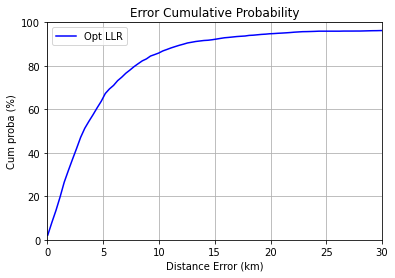

In [58]:
values, base = np.histogram(err_vec, bins=50000)
cumulative = np.cumsum(values) 
plt.figure();
plt.plot(base[:-1], cumulative / np.float(np.sum(values))  * 100.0, c='blue')
plt.grid(); plt.xlabel('Distance Error (km)'); plt.ylabel('Cum proba (%)'); plt.axis([0, 30, 0, 100]); 
plt.title('Error Cumulative Probability'); plt.legend( ["Opt LLR", "LLR 95", "LLR 99"])

In [59]:
# Error criterion

np.percentile(err_vec, 80)

8.2245602

In [44]:
# Construct test prediction

In [45]:
df_mess_test.head()

,messid,bsid,did,nseq,rssi,time_ux,bs_lat,bs_lng
0,573be2503e952e191262c351,3578,116539.0,2.0,-111.0,1.463542e+12,39.728651,-105.163032
1,573c05f83e952e1912758013,2617,472504.0,0.0,-136.0,1.463551e+12,39.779908,-105.062479
2,573c05f83e952e1912758013,3556,472504.0,0.0,-127.0,1.463551e+12,39.780658,-105.053676
3,573c05f83e952e1912758013,3578,472504.0,0.0,-129.0,1.463551e+12,39.728651,-105.163032
4,573c05f83e952e1912758013,4058,472504.0,0.0,-105.0,1.463551e+12,39.783211,-105.088747


In [46]:
df_feat_test, id_list_test = feat_mat_const(df_mess_test, listOfBs)

In [47]:
y_pred_lat, y_pred_lng = regressor_and_predict(df_feat, ground_truth_lat, ground_truth_lng, df_feat_test)

In [48]:
test_res = pd.DataFrame(np.array([y_pred_lat, y_pred_lng]).T, columns = ['lat', 'lng'])
test_res['messid'] = id_list_test

In [49]:
test_res.to_csv('pred_pos_test_list.csv', index=False)

In [50]:
test_res.head()

,lat,lng,messid
0,39.772912,-105.049629,573be2503e952e191262c351
1,39.774798,-105.062444,573c05f83e952e1912758013
2,39.678748,-105.012793,573c0796f0fe6e735a66deb3
3,39.773684,-105.037450,573c08d2864fce1a9a0563bc
4,39.678748,-105.012793,573c08ff864fce1a9a0579b0


### Version 2

In [60]:
# Feature Matrix construction 

def feat_mat_const2(df_mess_train, listOfBs):

    df_mess_bs_group = df_mess_train.groupby(['messid'], as_index=False) # group data by message (messid)
    nb_mess = len(np.unique(df_mess_train['messid']))
    df_feat = pd.DataFrame(np.zeros((nb_mess,len(listOfBs))), columns = listOfBs) # feature matrix
    idx = 0
    id_list = [0] * nb_mess

    for key, elmt in df_mess_bs_group:
        df_mess_bs_group.get_group(key)
        df_feat.loc[idx,df_mess_bs_group.get_group(key)['bsid']] = -df_mess_bs_group.get_group(key)['rssi']
        id_list[idx] = key
        idx = idx + 1
    
    return df_feat, id_list # add id value of each message for the correspondance to message  

In [61]:
df_feat2, id_list_train2 = feat_mat_const(df_mess_pos_train2, listOfBs)
df_feat2.head()

,879,911,921,944,980,1012,1086,1092,1120,1131,...,9936,9941,9949,10134,10148,10151,10162,10999,11007,11951
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
df_feat2.shape

(5870, 259)

In [62]:
# nb de balises qui ont reçu le message
# df_feat2['nb_bs'] = df_feat2[df_feat2 != 0.0].count(axis=1)
# df_feat2.shape

(5870, 260)

In [232]:
ground_truth_lat2, ground_truth_lng2 = ground_truth_const(df_mess_pos_train2, df_mess_pos_train2[['lat','lng']])
ground_truth_lat2.shape

(5870,)

#### Version 2.1 avec une régression linéaire

In [233]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
y_pred_lng2 = cross_val_predict(reg, df_feat2, ground_truth_lng2, cv=10)
y_pred_lat2 = cross_val_predict(reg, df_feat2, ground_truth_lat2, cv=10)

In [234]:
# Evaluate result

In [235]:
err_vec2 = Eval_geoloc(ground_truth_lat2 , ground_truth_lng2, y_pred_lat2, y_pred_lng2)

In [236]:
# Plot error distribution

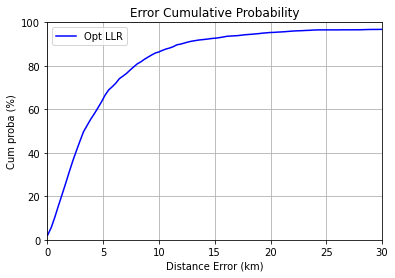

In [237]:
values, base = np.histogram(err_vec2, bins=50000)
cumulative = np.cumsum(values) 
plt.figure();
plt.plot(base[:-1], cumulative / np.float(np.sum(values))  * 100.0, c='blue')
plt.grid(); plt.xlabel('Distance Error (km)'); plt.ylabel('Cum proba (%)'); plt.axis([0, 30, 0, 100]); 
plt.title('Error Cumulative Probability'); plt.legend( ["Opt LLR", "LLR 95", "LLR 99"])

In [238]:
# Error criterion

np.percentile(err_vec2, 80)

8.1716658

#### Version 2.2 avec une SVR

Erreur au 80% :  8.6975266


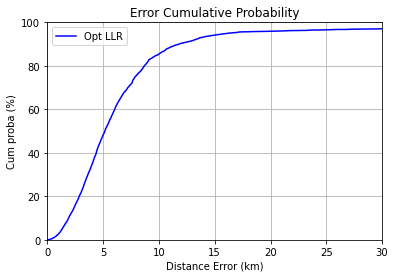

In [239]:
from sklearn.svm import SVR
svr = SVR()
y_pred_lng2 = cross_val_predict(svr, df_feat2, ground_truth_lng2, cv=10)
y_pred_lat2 = cross_val_predict(svr, df_feat2, ground_truth_lat2, cv=10)

# Evaluate result
err_vec2 = Eval_geoloc(ground_truth_lat2 , ground_truth_lng2, y_pred_lat2, y_pred_lng2)

# Plot error distribution
values, base = np.histogram(err_vec2, bins=50000)
cumulative = np.cumsum(values) 
plt.figure();
plt.plot(base[:-1], cumulative / np.float(np.sum(values))  * 100.0, c='blue')
plt.grid(); plt.xlabel('Distance Error (km)'); plt.ylabel('Cum proba (%)'); plt.axis([0, 30, 0, 100]); 
plt.title('Error Cumulative Probability'); plt.legend( ["Opt LLR", "LLR 95", "LLR 99"])

# Error criterion
print('Erreur au 80% : ',np.percentile(err_vec2, 80))


#### Version 2.3 avec une DecisionTreeRegressor

Erreur au 80% :  4.345079799999999


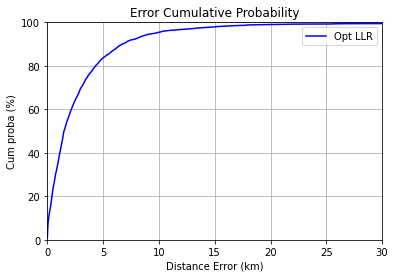

In [240]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
y_pred_lng2 = cross_val_predict(tree, df_feat2, ground_truth_lng2, cv=10)
y_pred_lat2 = cross_val_predict(tree, df_feat2, ground_truth_lat2, cv=10)

# Evaluate result
err_vec2 = Eval_geoloc(ground_truth_lat2 , ground_truth_lng2, y_pred_lat2, y_pred_lng2)

# Plot error distribution
values, base = np.histogram(err_vec2, bins=50000)
cumulative = np.cumsum(values) 
plt.figure();
plt.plot(base[:-1], cumulative / np.float(np.sum(values))  * 100.0, c='blue')
plt.grid(); plt.xlabel('Distance Error (km)'); plt.ylabel('Cum proba (%)'); plt.axis([0, 30, 0, 100]); 
plt.title('Error Cumulative Probability'); plt.legend( ["Opt LLR", "LLR 95", "LLR 99"])

# Error criterion
print('Erreur au 80% : ',np.percentile(err_vec2, 80))


#### Version 2.4 avec une Random Forest Regressor

Erreur au 80% :  3.6604728


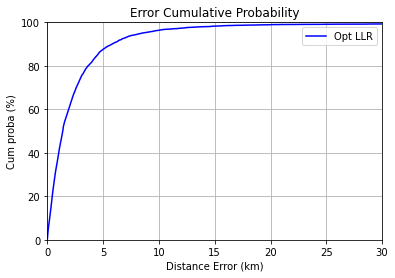

In [241]:
from sklearn.ensemble import RandomForestRegressor
tree = RandomForestRegressor(n_jobs=8)
y_pred_lng2 = cross_val_predict(tree, df_feat2, ground_truth_lng2, cv=10)
y_pred_lat2 = cross_val_predict(tree, df_feat2, ground_truth_lat2, cv=10)

# Evaluate result
err_vec2 = Eval_geoloc(ground_truth_lat2 , ground_truth_lng2, y_pred_lat2, y_pred_lng2)

# Plot error distribution
values, base = np.histogram(err_vec2, bins=50000)
cumulative = np.cumsum(values) 
plt.figure();
plt.plot(base[:-1], cumulative / np.float(np.sum(values))  * 100.0, c='blue')
plt.grid(); plt.xlabel('Distance Error (km)'); plt.ylabel('Cum proba (%)'); plt.axis([0, 30, 0, 100]); 
plt.title('Error Cumulative Probability'); plt.legend( ["Opt LLR", "LLR 95", "LLR 99"])

# Error criterion
print('Erreur au 80% : ',np.percentile(err_vec2, 80))


Erreur au 80% :  11.0330652


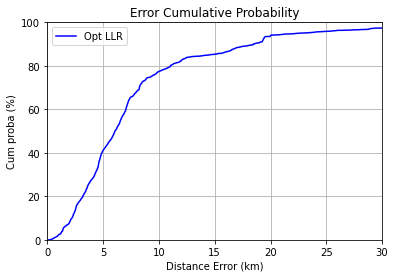

In [242]:
from sklearn.ensemble import RandomForestRegressor
tree = RandomForestRegressor(max_depth=10, n_jobs=8)
y_pred_lng2 = cross_val_predict(tree, df_feat2, ground_truth_lng2, cv=10)
y_pred_lat2 = cross_val_predict(tree, df_feat2, ground_truth_lat2, cv=10)

# Evaluate result
err_vec2 = Eval_geoloc(ground_truth_lat2 , ground_truth_lng2, y_pred_lat2, y_pred_lng2)

# Plot error distribution
values, base = np.histogram(err_vec2, bins=50000)
cumulative = np.cumsum(values) 
plt.figure();
plt.plot(base[:-1], cumulative / np.float(np.sum(values))  * 100.0, c='blue')
plt.grid(); plt.xlabel('Distance Error (km)'); plt.ylabel('Cum proba (%)'); plt.axis([0, 30, 0, 100]); 
plt.title('Error Cumulative Probability'); plt.legend( ["Opt LLR", "LLR 95", "LLR 99"])

# Error criterion
print('Erreur au 80% : ',np.percentile(err_vec2, 80))


### Essai embedding de graphe

In [159]:
from scipy import sparse

In [ ]:
sparse.csr_matrix()

In [154]:
from sknetwork.data import load_netset, karate_club
from sknetwork.embedding import BiSpectral, Spectral

In [195]:
bispectral = BiSpectral(10, normalized=False)

In [196]:
embedding = bispectral.fit_transform(sparse.csr_matrix(df_feat2))
embedding.shape

(5870, 10)

In [197]:
eigenvalues = bispectral.eigenvalues_
eigenvalues # il s'agit des valeurs propres de la matrice de transition (la première valeur est skippée)

array([0.93981705, 0.89966356, 0.8539031 , 0.77952379, 0.73002988,
       0.69264691, 0.60245075, 0.35057569, 0.14320986, 0.10204742])

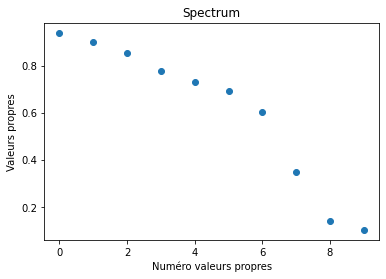

In [198]:
plt.figure()
plt.scatter(np.arange(10),eigenvalues)
plt.title('Spectrum')
plt.xlabel('Numéro valeurs propres')
plt.ylabel('Valeurs propres')
plt.show()

In [199]:
# on peut utiliser les 8 premiers vecteurs propres (0 compris) lorque Normalize = False
# on peut utiliser les 4 ou 8 premiers vecteurs propres (0 compris) lorque Normalize = True

In [206]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
y_pred_lng2 = cross_val_predict(reg, embedding[:,:8], ground_truth_lng2, cv=10)
y_pred_lat2 = cross_val_predict(reg, embedding[:,:8], ground_truth_lat2, cv=10)

In [207]:
# Evaluate result

In [208]:
err_vec2 = Eval_geoloc(ground_truth_lat2 , ground_truth_lng2, y_pred_lat2, y_pred_lng2)

In [209]:
# Plot error distribution

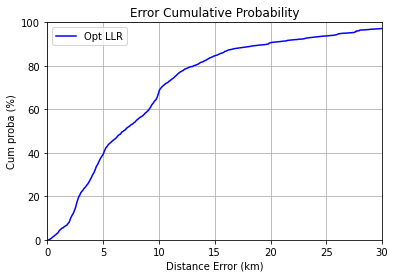

In [210]:
values, base = np.histogram(err_vec2, bins=50000)
cumulative = np.cumsum(values) 
plt.figure();
plt.plot(base[:-1], cumulative / np.float(np.sum(values))  * 100.0, c='blue')
plt.grid(); plt.xlabel('Distance Error (km)'); plt.ylabel('Cum proba (%)'); plt.axis([0, 30, 0, 100]); 
plt.title('Error Cumulative Probability'); plt.legend( ["Opt LLR", "LLR 95", "LLR 99"])

In [211]:
# Error criterion

np.percentile(err_vec2, 80)

13.129687800000001